# MEDICAL INSURANCE PREDICTION USING MACHINE LEARNING

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.shape

(1338, 7)

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# PRE-PROCESSING

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lab = LabelEncoder()
data['sex'] = lab.fit_transform(data['sex'])
data['smoker'] = lab.fit_transform(data['smoker'])
data['region'] = lab.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# DATA EXPLORATION

<Axes: xlabel='smoker', ylabel='count'>

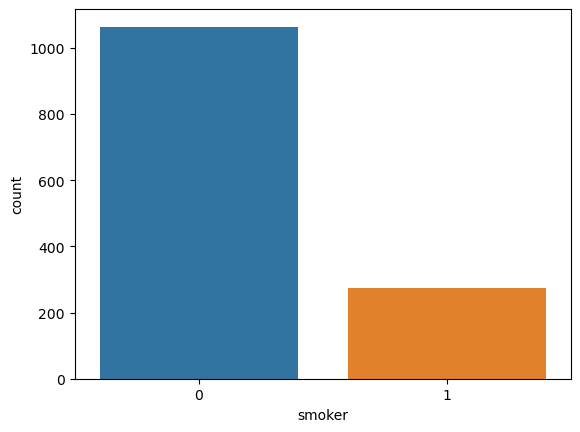

In [17]:
sns.countplot(x='smoker', data=data)

<Axes: xlabel='sex', ylabel='count'>

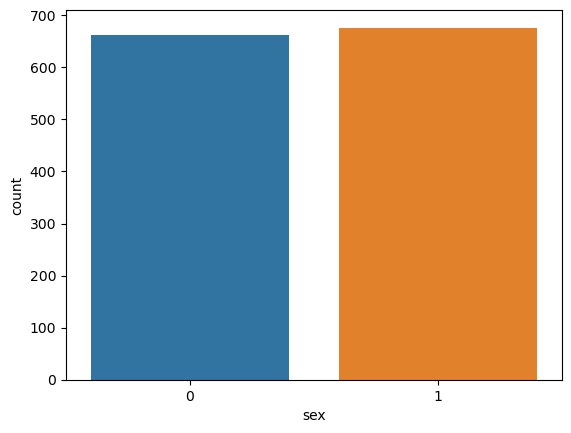

In [19]:
sns.countplot(x='sex', data=data)

# DATA SPLITTING

In [22]:
x = data.iloc[:, data.columns != 'charges']
y = data.iloc[:, data.columns == 'charges']

x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, roc_curve, auc

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
xtrain.head()
ytrain.head()

,charges
804,1815.87590
485,4347.02335
960,2730.10785
1017,3987.92600
526,24059.68019


# RANDOM FOREST REGRESSION ALGORITHM 

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
regression = RandomForestRegressor(n_estimators = 300, random_state = 0)
regression.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=300, random_state=0)

In [38]:
y_pred = regression.predict(xtest)

In [42]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [44]:
print('\n\nr2_score is ',r2_score(y_pred, ytest))



r2_score is  0.7760307269088842


# LINEAR REGRESSION ALGORITHM

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
alg = LinearRegression()
alg.fit(xtrain, ytrain)

LinearRegression()

In [51]:
t_predict = alg.predict(xtest)
print('\n\nr2_score is ',r2_score(t_predict, ytest))



r2_score is  0.6375205428169191


# DECISION TREE REGRESSION

In [54]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
x_predicted = dt.predict(xtest)
print('\n\nr2_score is ',r2_score(x_predicted, ytest))

# SVR

In [58]:
from sklearn.svm import SVR

In [60]:
regressor = SVR()
regressor.fit(xtrain, ytrain)
predict = regressor.predict(xtest)
print('\n\nr2_score is ',r2_score(predict, ytest))



r2_score is  -28047.640686228377


# Prediction on new vector

In [63]:
test_vector = np.reshape(np.asarray([19, 0, 27.900, 0, 1, 3]), (1, 6))
p = int(regressor.predict(test_vector)[0])
p

9289

# Steps in ML project
1. Data collection
2. Data preprocessing
3. Data exploration or Data Visulaization
4. Model selection
5. Model training
6. Model evalution
7. Model deployment

# Assignment


In [ ]:
pip install chatterbot

In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer

In [ ]:
chatbot = ChatBot("MyChatbot")
trainer = ChatterBotCorpusTrainer(chatbot)
trainer.train("chatterbot.corpus.english")